## Player Rating with ML

## Dataset:
```Player Identification```
- **ID**: Unique identifier for each player.
- **Name & FullName**: Player's short and full names.
- **PhotoUrl**: URL for the player's image.
- **Nationality**: Country of origin.

```Physical and Personal Details```
- **Age**: Player's age.
- **Height**: Player's height in cm.
- **Weight**: Player's weight in kg.
- **PreferredFoot**: Dominant foot (Left or Right).
- **IntReputation**: International reputation (scale from 1-5).

```Club and National Representation```
- **Club**: Current club name (or "Free agent").
- **ClubPosition**: Position in the club.
- **ClubNumber**: Jersey number at the club.
- **ClubJoined**: Date the player joined the club.
- **ContractUntil**: Contract expiration date.
- **OnLoad**: Indicates if the player is on loan.
- **NationalTeam**: National team name (or "Not in team").
- **NationalPosition**: Position in the national team.
- **NationalNumber**: Jersey number in the national team.

```Performance and Potential```
- **Overall**: Current overall rating.
- **Potential**: Maximum potential rating.
- **Growth**: Difference between potential and current ratings.
- **TotalStats & BaseStats**: Aggregated performance statistics.

```Financial Attributes```
- **ValueEUR**: Market value in Euros.
- **WageEUR**: Weekly wage in Euros.
- **ReleaseClause**: Release clause in Euros.

```Playing Positions```
- **Positions**: All possible positions for the player.
- **BestPosition**: Optimal playing position.

```Skills and Ratings```
- **WeakFoot**: Weak foot rating (1-5).
- **SkillMoves**: Skill move rating (1-5).
- **AttackingWorkRate & DefensiveWorkRate**: Work rate descriptors.
- **Position Ratings**: Ratings for various positions (e.g., STRating, CAMRating, CB).

```Attribute Details```
- **PaceTotal, ShootingTotal, PassingTotal, etc.**: Total scores for key attributes.
- **Detailed Stats**: Specific metrics like Crossing, Finishing, Dribbling, and Tackling.

```Goalkeeper-Specific Attributes```
- **GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes**: Detailed goalkeeper skills.
- **GKRating**: Overall goalkeeper rating.


## Dataset Validation

To ensure that our dataset is valid and the results we produce are reliable, we need to verify the data against authoritative sources. This validation ensures that our data aligns with the most accurate and up-to-date information from official governing bodies.

### Sources for Validation

1. **FIFA (International Governing Body for Football, Futsal, and Beach Football)**
   - We will verify the data against FIFA's official information on players, teams, and competitions. You can access the data here:
     - [FIFA Data Search Results](https://www.fifa.com/search-results?q=data)

2. **Electronic Arts - FIFA 22 Game Data**
   - Additionally, we will cross-check our data with the data available from the FIFA 22 game by Electronic Arts. This provides a reliable reference for player attributes, team details, and performance statistics. The official FIFA 22 information can be found here:
     - [FIFA 22 on EA Sports](https://www.ea.com/games/fifa/fifa-22)

By comparing our dataset to these sources, we can ensure that the data we are working with is accurate and validated, leading to trustworthy results in our analysis and predictions.


In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

In [155]:
data=pd.read_csv('players_fifa22.csv')

In [156]:
data

ID               Name                      FullName  Age  Height  \
0      158023           L. Messi                  Lionel Messi   34     170   
1      188545     R. Lewandowski            Robert Lewandowski   32     185   
2       20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   36     187   
3      231747          K. Mbappé                 Kylian Mbappé   22     182   
4      200389           J. Oblak                     Jan Oblak   28     188   
...       ...                ...                           ...  ...     ...   
19255  262759           S. Black                 Stephen Black   19     180   
19256  250978            Ma Zhen                       Zhen Ma   23     196   
19257  261985         Yang Haoyu                    Haoyu Yang   20     183   
19258  261977           He Siwei                      Siwei He   20     174   
19259  261932      Chen Guoliang                 Guoliang Chen   22     186   

       Weight                                          PhotoUrl  \
0          72  https://cdn.sofifa.com/players/158/023/22_60.png   
1          81  https://cdn.sofifa.com/players/188/545/22_60.png   
2          83  https://cdn.sofifa.com/players/020/801/22_60.png   
3          73  https://cdn.sofifa.com/players/231/747/22_60.png   
4          87  https://cdn.sofifa.com/players/200/389/22_60.png   
...       ...                                               ...   
19255      75  https://cdn.sofifa.com/players/262/759/22_60.png   
19256      85  https://cdn.sofifa.com/players/250/978/22_60.png   
19257      77  https://cdn.sofifa.com/players/261/985/22_60.png   
19258      69  https://cdn.sofifa.com/players/261/977/22_60.png   
19259      70  https://cdn.sofifa.com/players/261/932/22_60.png   

               Nationality  Overall  Potential  ...  LMRating  CMRating  \
0                Argentina       93         93  ...        93        90   
1                   Poland       92         92  ...        87        83   
2                 Portugal       91         91  ...        89        81   
3                   France       91         95  ...        92        84   
4                 Slovenia       91         93  ...        38        41   
...                    ...      ...        ...  ...       ...       ...   
19255  Republic of Ireland       48         62  ...        36        35   
19256             China PR       48         52  ...        26        23   
19257             China PR       48         55  ...        36        35   
19258             China PR       48         58  ...        38        37   
19259             China PR       48         53  ...        35        35   

       RMRating LWBRating CDMRating RWBRating  LBRating  CBRating  RBRating  \
0            93        69        67        69        64        53        64   
1            87        67        69        67        64        63        64   
2            89        66        62        66        63        56        63   
3            92        70        66        70        66        57        66   
4            38        35        39        35        35        36        35   
...         ...       ...       ...       ...       ...       ...       ...   
19255        36        44        43        44        47        50        47   
19256        26        26        23        26        26        26        26   
19257        36        46        45        46        48        50        48   
19258        38        46        45        46        49        50        49   
19259        35        46        44        46        48        50        48   

      GKRating  
0           22  
1           22  
2           23  
3           21  
4           92  
...        ...  
19255       15  
19256       49  
19257       15  
19258       17  
19259       16  

[19260 rows x 90 columns]

In [157]:
data.shape

(19260, 90)

In [158]:
data.describe().T

count           mean           std    min       25%       50%  \
ID         19260.0  231682.741952  26960.272515   41.0  214903.5  236687.5   
Age        19260.0      25.184683      4.737340   16.0      21.0      25.0   
Height     19260.0     181.305036      6.866151  155.0     176.0     181.0   
Weight     19260.0      74.950779      7.066864   49.0      70.0      75.0   
Overall    19260.0      65.815628      6.817297   48.0      62.0      66.0   
...            ...            ...           ...    ...       ...       ...   
RWBRating  19260.0      56.197040     13.818416   17.0      51.0      59.0   
LBRating   19260.0      55.539823     14.063862   16.0      49.0      59.0   
CBRating   19260.0      54.379595     14.678658   18.0      44.0      58.0   
RBRating   19260.0      55.539823     14.063862   16.0      49.0      59.0   
GKRating   19260.0      23.242939     15.053823   10.0      17.0      18.0   

                75%       max  
ID         253607.5  264705.0  
Age            29.0      54.0  
Height        186.0     206.0  
Weight         80.0     110.0  
Overall        70.0      93.0  
...             ...       ...  
RWBRating      65.0      88.0  
LBRating       65.0      88.0  
CBRating       66.0      89.0  
RBRating       65.0      88.0  
GKRating       20.0      92.0  

[76 rows x 8 columns]

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 19260 non-null  int64  
 1   Name               19260 non-null  object 
 2   FullName           19260 non-null  object 
 3   Age                19260 non-null  int64  
 4   Height             19260 non-null  int64  
 5   Weight             19260 non-null  int64  
 6   PhotoUrl           19260 non-null  object 
 7   Nationality        19260 non-null  object 
 8   Overall            19260 non-null  int64  
 9   Potential          19260 non-null  int64  
 10  Growth             19260 non-null  int64  
 11  TotalStats         19260 non-null  int64  
 12  BaseStats          19260 non-null  int64  
 13  Positions          19260 non-null  object 
 14  BestPosition       19260 non-null  object 
 15  Club               19260 non-null  object 
 16  ValueEUR           192

In [160]:
data.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [161]:
data[data['Name']=='L. Messi']

ID      Name      FullName  Age  Height  Weight  \
0  158023  L. Messi  Lionel Messi   34     170      72   

                                           PhotoUrl Nationality  Overall  \
0  https://cdn.sofifa.com/players/158/023/22_60.png   Argentina       93   

   Potential  ...  LMRating  CMRating  RMRating LWBRating CDMRating RWBRating  \
0         93  ...        93        90        93        69        67        69   

   LBRating  CBRating  RBRating GKRating  
0        64        53        64       22  

[1 rows x 90 columns]

In [162]:
# Set modern theme
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
import warnings
warnings.filterwarnings('ignore')

# 1️⃣ Player Distribution by Overall Rating


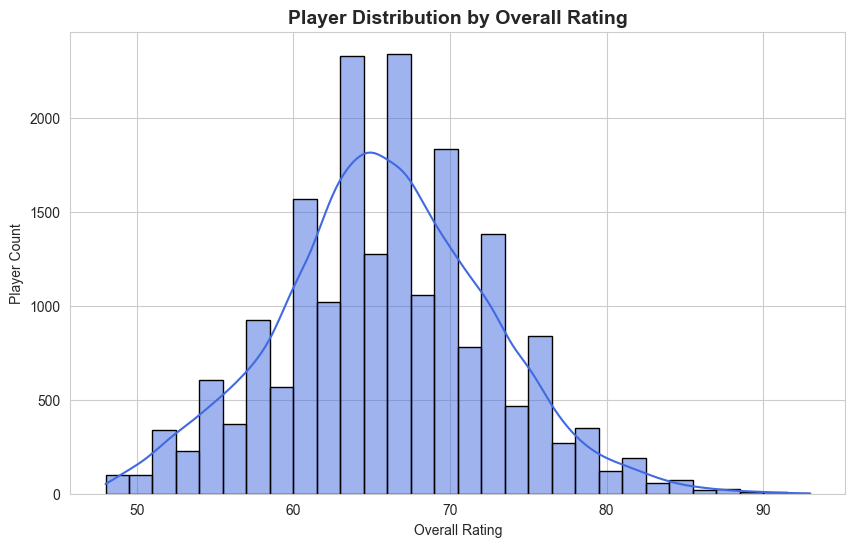

In [163]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Overall'], bins=30, kde=True, color='royalblue', edgecolor='black')
plt.title("Player Distribution by Overall Rating", fontsize=14, fontweight='bold')
plt.xlabel("Overall Rating")
plt.ylabel("Player Count")
plt.show()


# 2️⃣ Market Value vs. Overall Rating


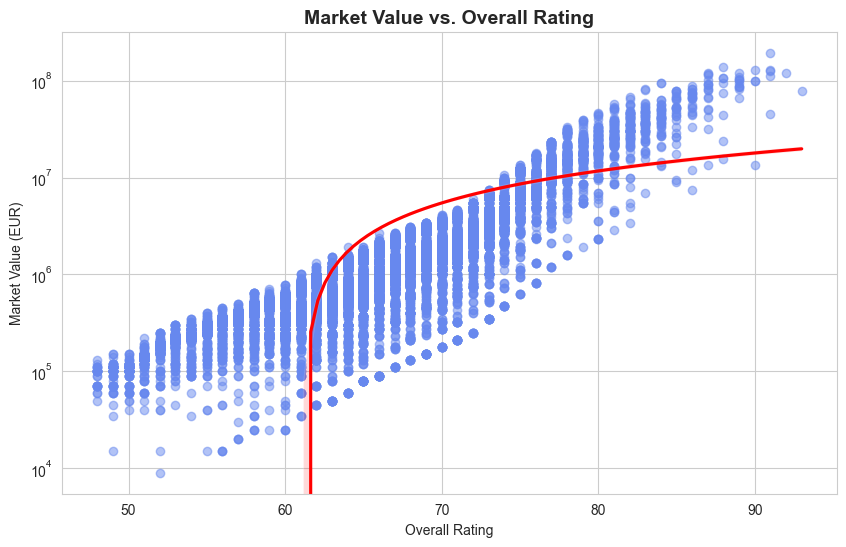

In [164]:
plt.figure(figsize=(10, 6))
sns.regplot(x=data['Overall'], y=data['ValueEUR'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Market Value vs. Overall Rating", fontsize=14, fontweight='bold')
plt.xlabel("Overall Rating")
plt.ylabel("Market Value (EUR)")
plt.yscale("log")  # Log scale to manage large value differences
plt.show()

# 3️⃣ Top 10 Nationalities by Player Count


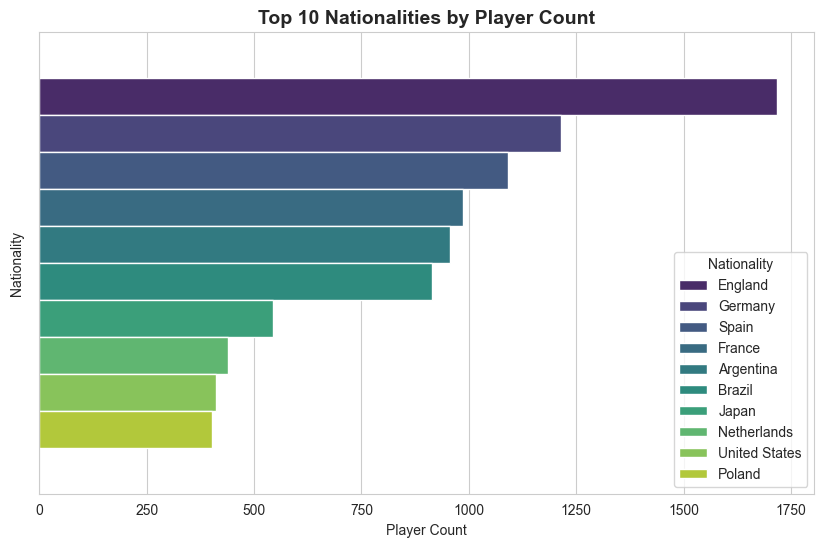

In [165]:
plt.figure(figsize=(10, 6))
top_nationalities = data['Nationality'].value_counts().nlargest(10)
sns.barplot(x=top_nationalities.values, hue=top_nationalities.index, palette='viridis')
plt.title("Top 10 Nationalities by Player Count", fontsize=14, fontweight='bold')
plt.xlabel("Player Count")
plt.ylabel("Nationality")
plt.show()

# 4️⃣ Club Spending Distribution (First 10 Clubs)


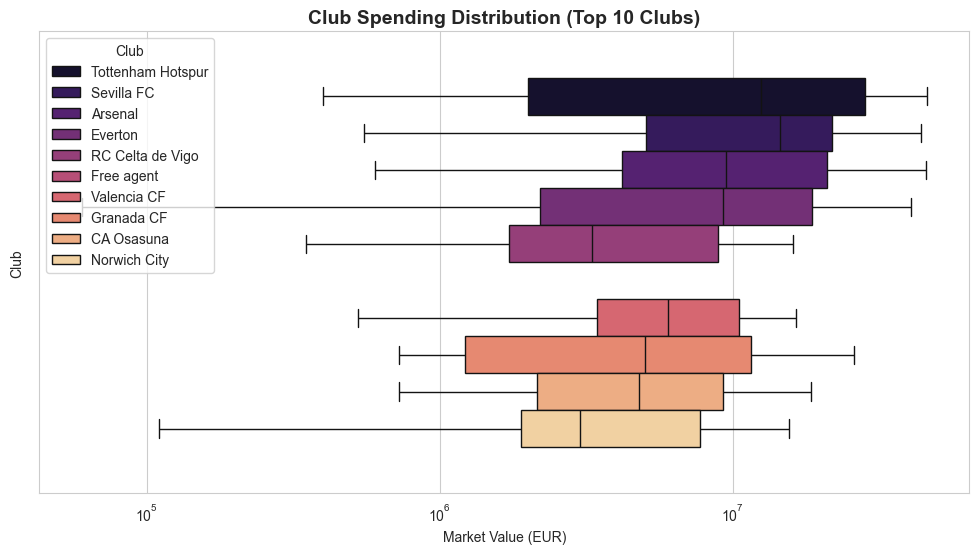

In [166]:
top_clubs = data['Club'].value_counts().nlargest(10).index
df_top_clubs = data[data['Club'].isin(top_clubs)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_top_clubs['ValueEUR'], hue=df_top_clubs['Club'], showfliers=False, palette='magma')
plt.title("Club Spending Distribution (Top 10 Clubs)", fontsize=14, fontweight='bold')
plt.xlabel("Market Value (EUR)")
plt.ylabel("Club")
plt.xscale("log")  # Log scale for better visualization
plt.show()

# 5️⃣ Player Attributes Radar Chart

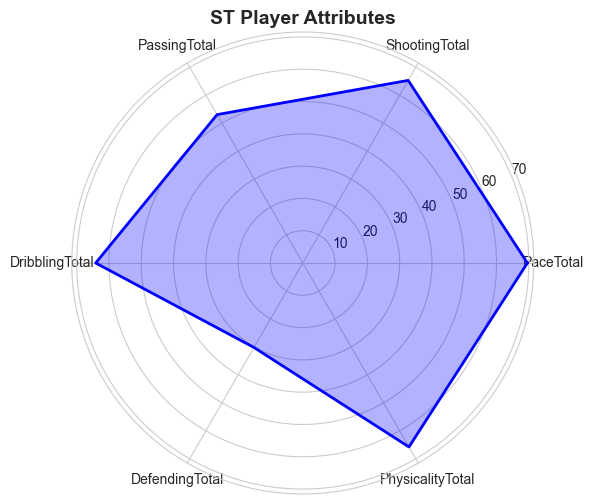

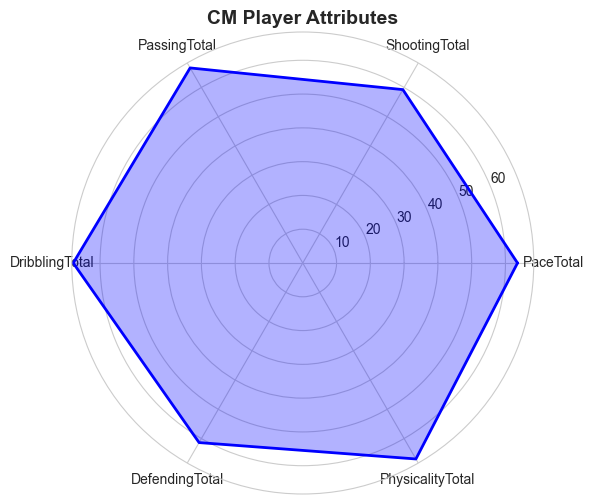

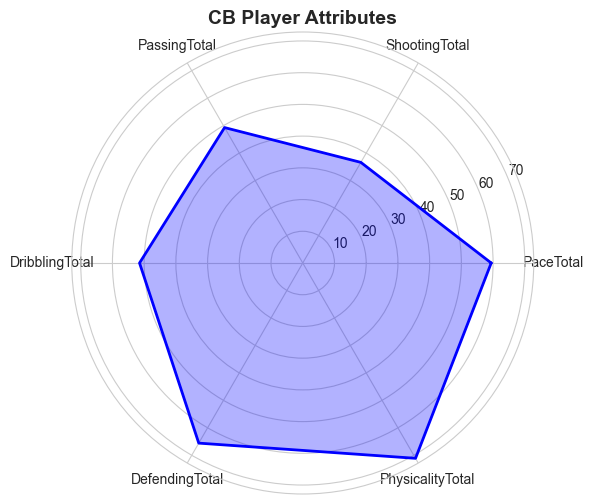

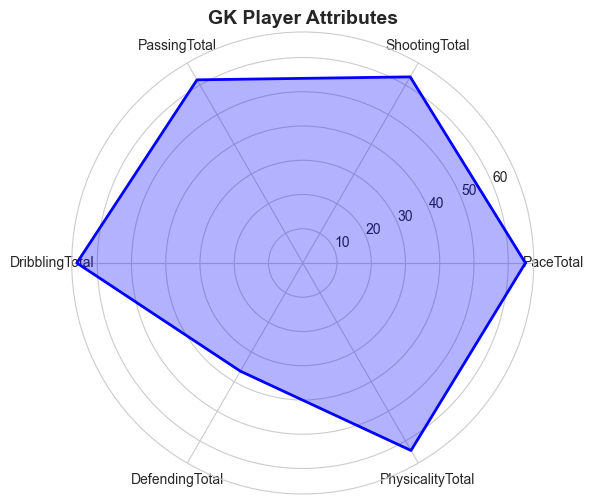

In [167]:
def radar_chart(position, attributes):
    df_position = data[data['BestPosition'] == position][attributes].mean()
    angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
    df_position = np.concatenate((df_position, [df_position[0]]))
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, df_position, color='blue', alpha=0.3)
    ax.plot(angles, df_position, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    plt.title(f"{position} Player Attributes", fontsize=14, fontweight='bold')
    plt.show()

positions = ['ST', 'CM', 'CB', 'GK']
attributes = ['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
for pos in positions:
    radar_chart(pos, attributes)

# 6️⃣ Young vs. Old Players: Performance Comparison

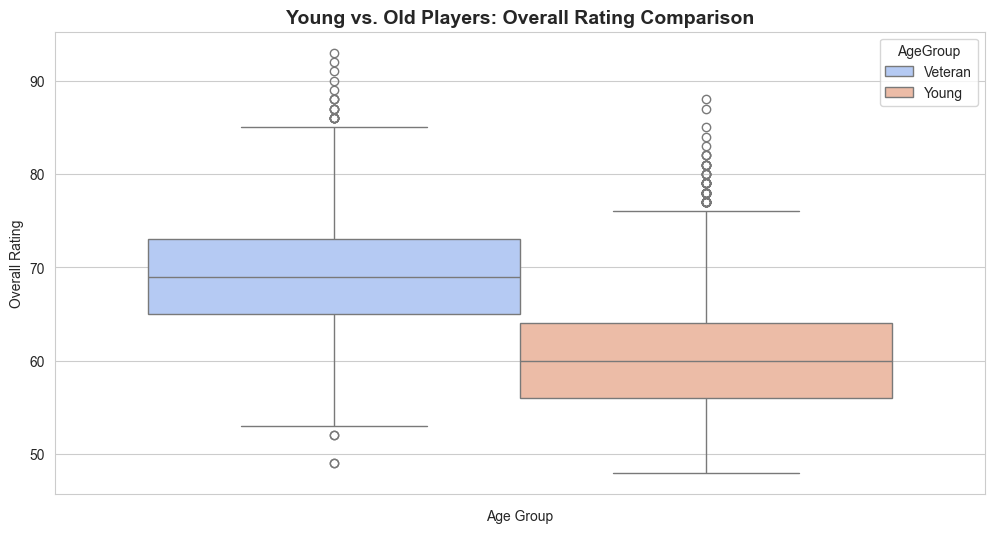

In [168]:
data['AgeGroup'] = np.where(data['Age'] <= 21, 'Young', np.where(data['Age'] >= 32, 'Veteran', 'Other'))
df_filtered = data[data['AgeGroup'].isin(['Young', 'Veteran'])]

plt.figure(figsize=(12, 6))
sns.boxplot(hue='AgeGroup', y='Overall', data=df_filtered, palette='coolwarm')
plt.title("Young vs. Old Players: Overall Rating Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Age Group")
plt.ylabel("Overall Rating")
plt.show()

# 7️⃣ Club-Wise Average Player Rating

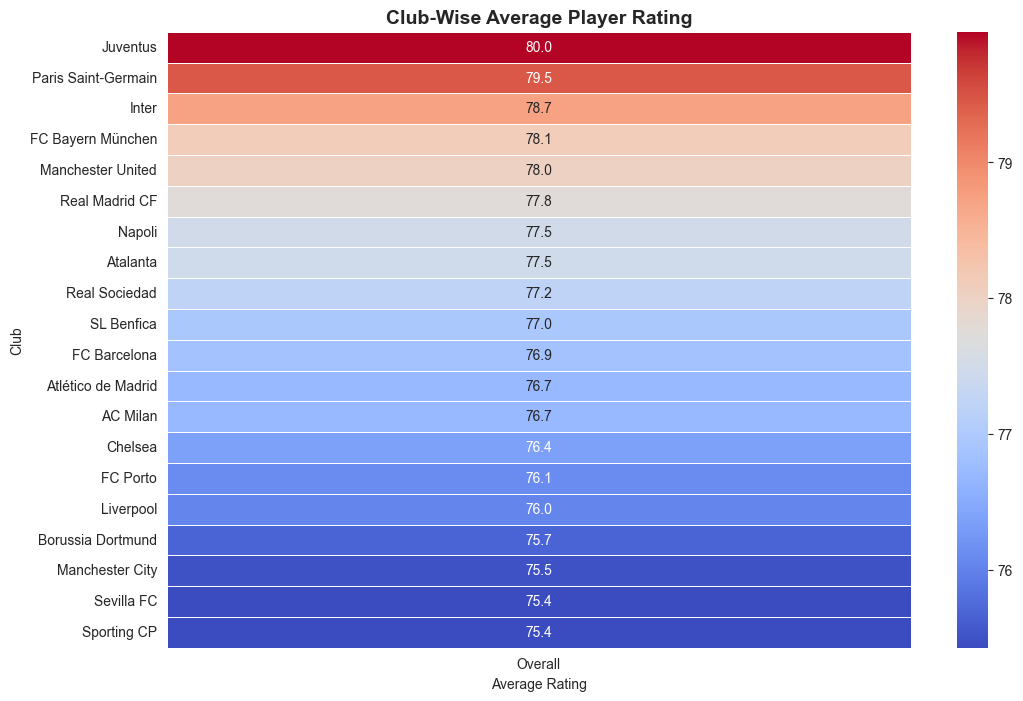

In [169]:
top_clubs_avg = data.groupby('Club')['Overall'].mean().nlargest(20)
plt.figure(figsize=(12, 8))
sns.heatmap(top_clubs_avg.to_frame(), annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title("Club-Wise Average Player Rating", fontsize=14, fontweight='bold')
plt.xlabel("Average Rating")
plt.ylabel("Club")
plt.show()


# 8️⃣ Player Distribution by Position


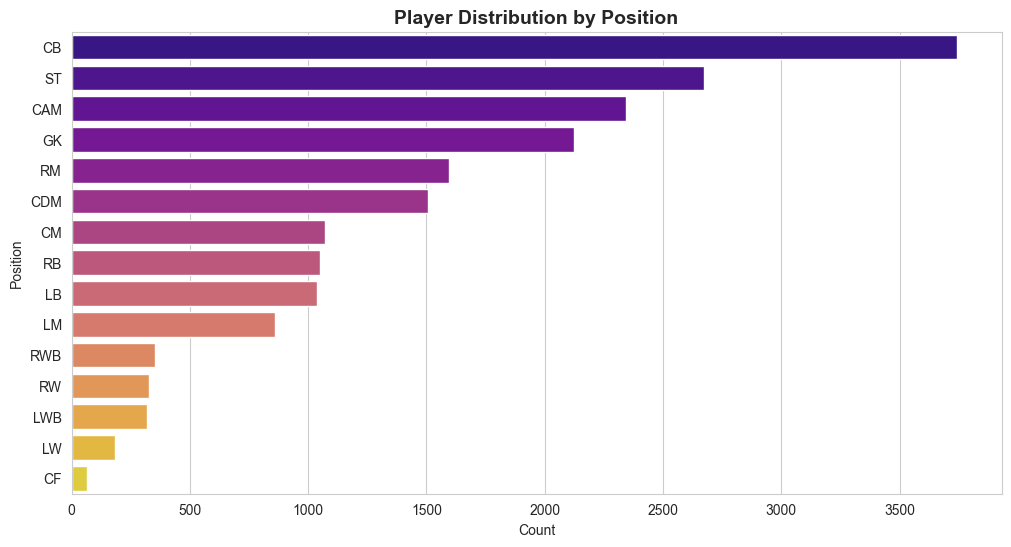

In [170]:
plt.figure(figsize=(12, 6))
sns.countplot(y=data['BestPosition'], order=data['BestPosition'].value_counts().index, palette='plasma')
plt.title("Player Distribution by Position", fontsize=14, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Position")
plt.show()

# 9️⃣ Age vs. Market Value with Interactive Scatter Plot

In [171]:
import plotly.express as px
fig = px.scatter(data, x='Age', y='ValueEUR', color='Overall', hover_data=['Name', 'Club'], size='Overall', title="Age vs. Market Value")
fig.update_layout(xaxis_title="Age", yaxis_title="Market Value (EUR)", yaxis_type="log")
fig.show()

In [172]:
import plotly.graph_objects as go

# Filter data for Messi and Ronaldo
messi = data[data['Name'] == 'L. Messi']
ronaldo = data[data['Name'] == 'Cristiano Ronaldo']

In [173]:
if not messi.empty and not ronaldo.empty:
    attributes = ['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
    
    # Extract values
    messi_values = messi[attributes].values.flatten().tolist()
    ronaldo_values = ronaldo[attributes].values.flatten().tolist()
    messi_values += messi_values[:1]  
    ronaldo_values += ronaldo_values[:1]
    
    angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
    angles += angles[:1]
    
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(r=messi_values, theta=attributes + [attributes[0]], fill='toself', name='L. Messi', line_color='gold'))
    fig.add_trace(go.Scatterpolar(r=ronaldo_values, theta=attributes + [attributes[0]], fill='toself', name='C. Ronaldo', line_color='red'))
    fig.update_layout(polar=dict(radialaxis=dict(visible=True)), title="Messi vs. Ronaldo - Attributes")
    fig.show()
    

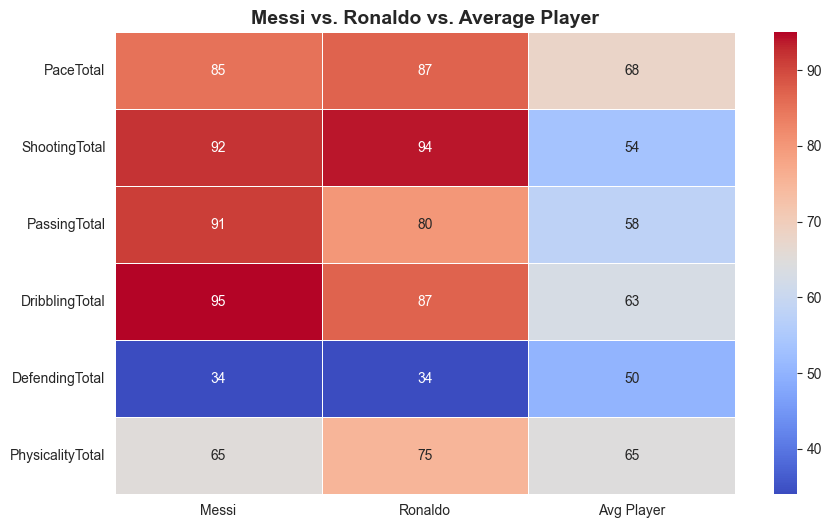

In [174]:
    # Heatmap Comparison
    avg_player = data[attributes].mean()
    comparison_df = pd.DataFrame({'Messi': messi[attributes].values.flatten(), 'Ronaldo': ronaldo[attributes].values.flatten(), 'Avg Player': avg_player.values}, index=attributes)
    plt.figure(figsize=(10, 6))
    sns.heatmap(comparison_df, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Messi vs. Ronaldo vs. Average Player", fontsize=14, fontweight='bold')
    plt.show()

In [175]:
cleaned_data=data.drop(['ID', 'Name', 'FullName', 'Age', 'PhotoUrl','IntReputation',
       'Nationality','STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating',
       'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'LWBRating',
       'CDMRating', 'RWBRating', 'LBRating', 'CBRating', 'RBRating','AttackingWorkRate', 'DefensiveWorkRate',
       'GKRating','ClubPosition', 'ContractUntil', 'ClubNumber','Club',
       'ClubJoined','OnLoad', 'NationalTeam', 'NationalPosition','BestPosition',
       'NationalNumber','TotalStats','ReleaseClause', 'WageEUR','AgeGroup',
       'BaseStats','Growth','Potential'],axis=1)

we drop unneeded col

In [176]:
cleaned_data.columns

Index(['Height', 'Weight', 'Overall', 'Positions', 'ValueEUR', 'PreferredFoot',
       'WeakFoot', 'SkillMoves', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [177]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Height            19260 non-null  int64 
 1   Weight            19260 non-null  int64 
 2   Overall           19260 non-null  int64 
 3   Positions         19260 non-null  object
 4   ValueEUR          19260 non-null  int64 
 5   PreferredFoot     19260 non-null  object
 6   WeakFoot          19260 non-null  int64 
 7   SkillMoves        19260 non-null  int64 
 8   PaceTotal         19260 non-null  int64 
 9   ShootingTotal     19260 non-null  int64 
 10  PassingTotal      19260 non-null  int64 
 11  DribblingTotal    19260 non-null  int64 
 12  DefendingTotal    19260 non-null  int64 
 13  PhysicalityTotal  19260 non-null  int64 
 14  Crossing          19260 non-null  int64 
 15  Finishing         19260 non-null  int64 
 16  HeadingAccuracy   19260 non-null  int64 
 17  ShortPassing

In [178]:
cleaned_data.isnull().sum()==True

Height              False
Weight              False
Overall             False
Positions           False
ValueEUR            False
PreferredFoot       False
WeakFoot            False
SkillMoves          False
PaceTotal           False
ShootingTotal       False
PassingTotal        False
DribblingTotal      False
DefendingTotal      False
PhysicalityTotal    False
Crossing            False
Finishing           False
HeadingAccuracy     False
ShortPassing        False
Volleys             False
Dribbling           False
Curve               False
FKAccuracy          False
LongPassing         False
BallControl         False
Acceleration        False
SprintSpeed         False
Agility             False
Reactions           False
Balance             False
ShotPower           False
Jumping             False
Stamina             False
Strength            False
LongShots           False
Aggression          False
Interceptions       False
Positioning         False
Vision              False
Penalties   

In [179]:
cleaned_data.duplicated().sum()

104

In [180]:
cleaned_data.drop_duplicates(inplace=True)

In [181]:
cleaned_data['Positions_Encoded'] = cleaned_data['Positions'].apply(lambda x: len(x.split(',')))
cleaned_data = cleaned_data.drop(columns=['Positions'])

In [182]:
cleaned_data['PreferredFoot_Encoded'] = cleaned_data['PreferredFoot'].apply(lambda x: 1 if x == 'Right' else 0)
cleaned_data = cleaned_data.drop(columns=['PreferredFoot'])

In [183]:
cleaned_data

Height  Weight  Overall   ValueEUR  WeakFoot  SkillMoves  PaceTotal  \
0         170      72       93   78000000         4           4         85   
1         185      81       92  119500000         4           4         78   
2         187      83       91   45000000         4           5         87   
3         182      73       91  194000000         4           5         97   
4         188      87       91  112000000         3           1         87   
...       ...     ...      ...        ...       ...         ...        ...   
19255     180      75       48     100000         3           2         56   
19256     196      85       48      50000         2           1         49   
19257     183      77       48      90000         3           2         57   
19258     174      69       48     100000         3           2         61   
19259     186      70       48      70000         3           2         55   

       ShootingTotal  PassingTotal  DribblingTotal  ...  Marking  \
0                 92            91              95  ...       20   
1                 92            79              85  ...       35   
2                 94            80              87  ...       24   
3                 88            80              92  ...       26   
4                 92            78              90  ...       27   
...              ...           ...             ...  ...      ...   
19255             27            29              33  ...       50   
19256             47            45              46  ...       20   
19257             26            29              28  ...       52   
19258             25            32              32  ...       52   
19259             27            29              30  ...       50   

       StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0                  35             24         6          11         15   
1                  42             19        15           6         12   
2                  32             24         7          11         15   
3                  34             32        13           5          7   
4                  12             18        87          92         78   
...               ...            ...       ...         ...        ...   
19255              49             47         5           6          7   
19256              16             18        49          47         45   
19257              53             51        14          12         10   
19258              51             52        10          13          7   
19259              54             55         8          12         15   

       GKPositioning  GKReflexes  Positions_Encoded  PreferredFoot_Encoded  
0                 14           8                  3                      0  
1                  8          10                  1                      1  
2                 14          11                  2                      1  
3                 11           6                  2                      1  
4                 90          90                  1                      1  
...              ...         ...                ...                    ...  
19255             13          10                  1                      1  
19256             44          46                  1                      1  
19257              7           7                  1                      1  
19258              7          15                  1                      1  
19259             14           6                  1                      1  

[19156 rows x 48 columns]

In [184]:
numerical_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
cleaned_data_log_transformed = cleaned_data.copy()
cleaned_data_log_transformed[numerical_cols] = cleaned_data_log_transformed[numerical_cols].apply(lambda x: np.log(x + 1))


In [185]:
cleaned_data_log_transformed

Height    Weight   Overall   ValueEUR  WeakFoot  SkillMoves  \
0      5.141664  4.290459  4.543295  18.172219  1.609438    1.609438   
1      5.225747  4.406719  4.532599  18.598827  1.609438    1.609438   
2      5.236442  4.430817  4.521789  17.622173  1.609438    1.791759   
3      5.209486  4.304065  4.521789  19.083369  1.609438    1.791759   
4      5.241747  4.477337  4.521789  18.534009  1.386294    0.693147   
...         ...       ...       ...        ...       ...         ...   
19255  5.198497  4.330733  3.891820  11.512935  1.386294    1.098612   
19256  5.283204  4.454347  3.891820  10.819798  1.098612    0.693147   
19257  5.214936  4.356709  3.891820  11.407576  1.386294    1.098612   
19258  5.164786  4.248495  3.891820  11.512935  1.386294    1.098612   
19259  5.231109  4.262680  3.891820  11.156265  1.386294    1.098612   

       PaceTotal  ShootingTotal  PassingTotal  DribblingTotal  ...   Marking  \
0       4.454347       4.532599      4.521789        4.564348  ...  3.044522   
1       4.369448       4.532599      4.382027        4.454347  ...  3.583519   
2       4.477337       4.553877      4.394449        4.477337  ...  3.218876   
3       4.584967       4.488636      4.394449        4.532599  ...  3.295837   
4       4.477337       4.532599      4.369448        4.510860  ...  3.332205   
...          ...            ...           ...             ...  ...       ...   
19255   4.043051       3.332205      3.401197        3.526361  ...  3.931826   
19256   3.912023       3.871201      3.828641        3.850148  ...  3.044522   
19257   4.060443       3.295837      3.401197        3.367296  ...  3.970292   
19258   4.127134       3.258097      3.496508        3.496508  ...  3.970292   
19259   4.025352       3.332205      3.401197        3.433987  ...  3.931826   

       StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0            3.583519       3.218876  1.945910    2.484907   2.772589   
1            3.761200       2.995732  2.772589    1.945910   2.564949   
2            3.496508       3.218876  2.079442    2.484907   2.772589   
3            3.555348       3.496508  2.639057    1.791759   2.079442   
4            2.564949       2.944439  4.477337    4.532599   4.369448   
...               ...            ...       ...         ...        ...   
19255        3.912023       3.871201  1.791759    1.945910   2.079442   
19256        2.833213       2.944439  3.912023    3.871201   3.828641   
19257        3.988984       3.951244  2.708050    2.564949   2.397895   
19258        3.951244       3.970292  2.397895    2.639057   2.079442   
19259        4.007333       4.025352  2.197225    2.564949   2.772589   

       GKPositioning  GKReflexes  Positions_Encoded  PreferredFoot_Encoded  
0           2.708050    2.197225           1.386294               0.000000  
1           2.197225    2.397895           0.693147               0.693147  
2           2.708050    2.484907           1.098612               0.693147  
3           2.484907    1.945910           1.098612               0.693147  
4           4.510860    4.510860           0.693147               0.693147  
...              ...         ...                ...                    ...  
19255       2.639057    2.397895           0.693147               0.693147  
19256       3.806662    3.850148           0.693147               0.693147  
19257       2.079442    2.079442           0.693147               0.693147  
19258       2.079442    2.772589           0.693147               0.693147  
19259       2.708050    1.945910           0.693147               0.693147  

[19156 rows x 48 columns]

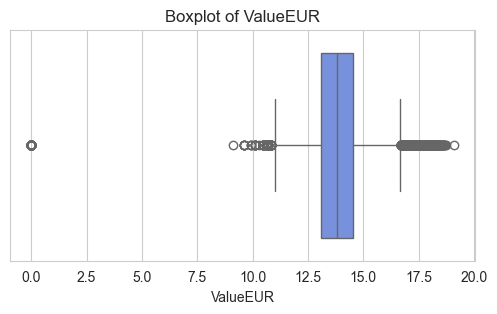

In [186]:
plt.figure(figsize=(6,3))
sns.boxplot(x=cleaned_data_log_transformed['ValueEUR'])
plt.title('Boxplot of ValueEUR')
plt.show()

<Axes: ylabel='ValueEUR'>

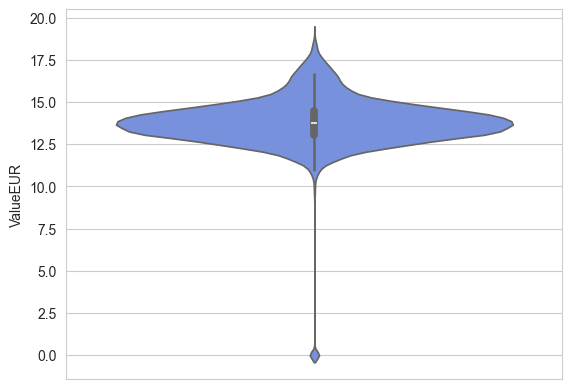

In [187]:
sns.violinplot(cleaned_data_log_transformed['ValueEUR'])

In [188]:
cleaned_data

Height  Weight  Overall   ValueEUR  WeakFoot  SkillMoves  PaceTotal  \
0         170      72       93   78000000         4           4         85   
1         185      81       92  119500000         4           4         78   
2         187      83       91   45000000         4           5         87   
3         182      73       91  194000000         4           5         97   
4         188      87       91  112000000         3           1         87   
...       ...     ...      ...        ...       ...         ...        ...   
19255     180      75       48     100000         3           2         56   
19256     196      85       48      50000         2           1         49   
19257     183      77       48      90000         3           2         57   
19258     174      69       48     100000         3           2         61   
19259     186      70       48      70000         3           2         55   

       ShootingTotal  PassingTotal  DribblingTotal  ...  Marking  \
0                 92            91              95  ...       20   
1                 92            79              85  ...       35   
2                 94            80              87  ...       24   
3                 88            80              92  ...       26   
4                 92            78              90  ...       27   
...              ...           ...             ...  ...      ...   
19255             27            29              33  ...       50   
19256             47            45              46  ...       20   
19257             26            29              28  ...       52   
19258             25            32              32  ...       52   
19259             27            29              30  ...       50   

       StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0                  35             24         6          11         15   
1                  42             19        15           6         12   
2                  32             24         7          11         15   
3                  34             32        13           5          7   
4                  12             18        87          92         78   
...               ...            ...       ...         ...        ...   
19255              49             47         5           6          7   
19256              16             18        49          47         45   
19257              53             51        14          12         10   
19258              51             52        10          13          7   
19259              54             55         8          12         15   

       GKPositioning  GKReflexes  Positions_Encoded  PreferredFoot_Encoded  
0                 14           8                  3                      0  
1                  8          10                  1                      1  
2                 14          11                  2                      1  
3                 11           6                  2                      1  
4                 90          90                  1                      1  
...              ...         ...                ...                    ...  
19255             13          10                  1                      1  
19256             44          46                  1                      1  
19257              7           7                  1                      1  
19258              7          15                  1                      1  
19259             14           6                  1                      1  

[19156 rows x 48 columns]

In [189]:
def make_mi_scores(X, y):
     mi_scores = mutual_info_regression(X, y)
     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
     mi_scores = mi_scores.sort_values(ascending=False)
     return mi_scores
mi_scores = make_mi_scores(cleaned_data.drop(['Overall'],axis=1), cleaned_data['Overall'])
mi_scores

ValueEUR                 1.286299
Reactions                0.759852
BallControl              0.511879
DribblingTotal           0.479767
Composure                0.458185
ShortPassing             0.445296
PassingTotal             0.403944
DefendingTotal           0.398375
Interceptions            0.365804
Dribbling                0.342217
ShootingTotal            0.324267
StandingTackle           0.321798
Positioning              0.307964
Marking                  0.304232
SlidingTackle            0.280444
Vision                   0.272037
Crossing                 0.265353
ShotPower                0.258434
LongShots                0.249709
LongPassing              0.247613
PhysicalityTotal         0.222931
Curve                    0.198968
HeadingAccuracy          0.182823
Volleys                  0.175769
Finishing                0.174465
Stamina                  0.159725
Aggression               0.152320
GKReflexes               0.143253
GKDiving                 0.142291
GKPositioning 

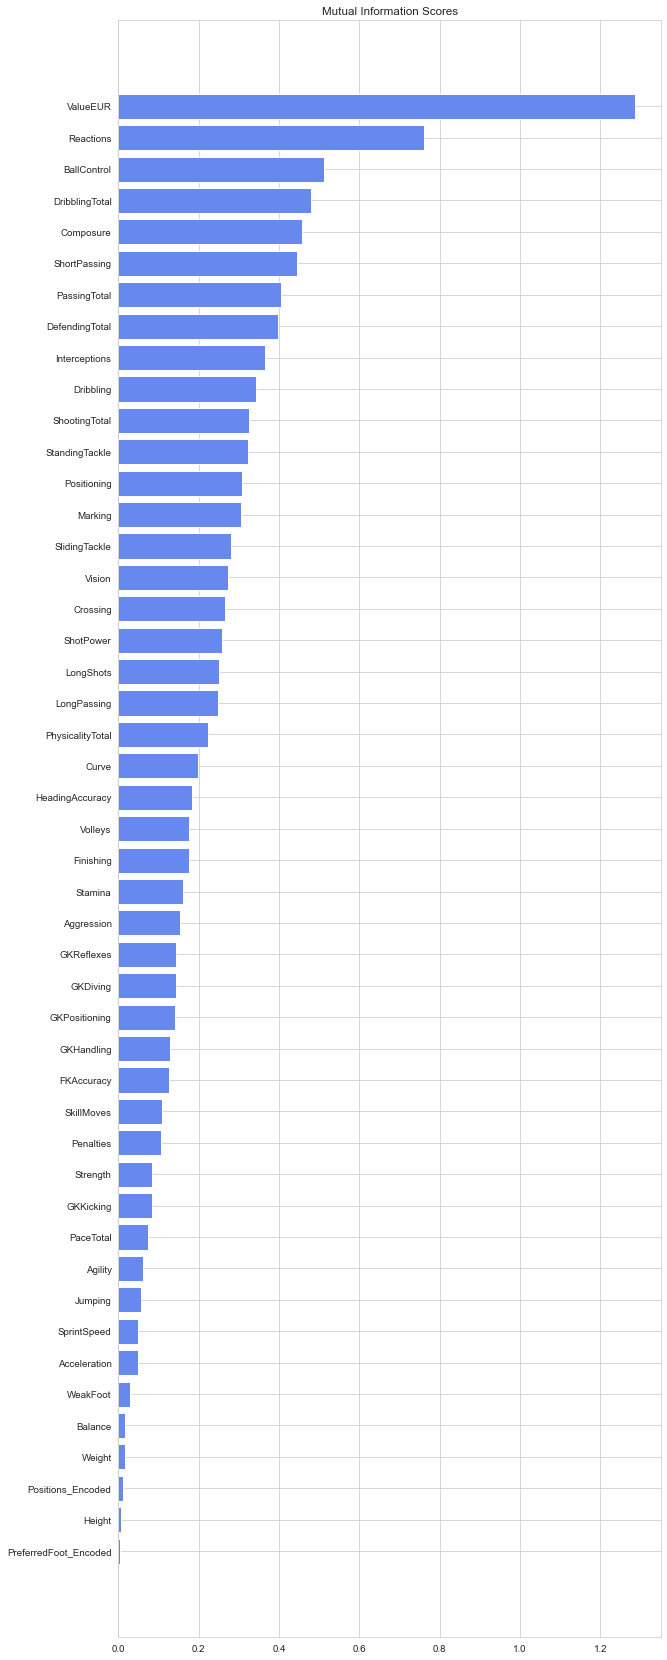

In [190]:
 def plot_mi_scores(scores):
     scores = scores.sort_values(ascending=True)
     width = np.arange(len(scores))
     ticks = list(scores.index)
     plt.barh(width, scores)
     plt.yticks(width, ticks)
     plt.title("Mutual Information Scores")
plt.figure(dpi=70, figsize=(10, 30))
plot_mi_scores(mi_scores)

In [191]:
 m1_scores = pd.DataFrame(mi_scores).reset_index()
 m2_scores = m1_scores.rename(columns = {'index' : 'feature'})
 m3_score = m2_scores[m2_scores['MI Scores'] >= 0.3]
 g1_x1 = cleaned_data[m3_score.feature.unique()]

In [192]:
g1_x1

ValueEUR  Reactions  BallControl  DribblingTotal  Composure  \
0       78000000         94           96              95         96   
1      119500000         93           88              85         88   
2       45000000         94           88              87         95   
3      194000000         93           91              92         88   
4      112000000         88           30              90         68   
...          ...        ...          ...             ...        ...   
19255     100000         49           29              33         44   
19256      50000         51           13              46         13   
19257      90000         41           26              28         45   
19258     100000         49           29              32         42   
19259      70000         47           25              30         38   

       ShortPassing  PassingTotal  DefendingTotal  Interceptions  Dribbling  \
0                91            91              34             40         96   
1                85            79              44             49         85   
2                80            80              34             29         88   
3                85            80              36             38         93   
4                43            78              52             19         12   
...             ...           ...             ...            ...        ...   
19255            28            29              48             45         27   
19256            13            45              54             16         11   
19257            32            29              51             50         23   
19258            38            32              49             45         24   
19259            29            29              50             45         25   

       ShootingTotal  StandingTackle  Positioning  Marking  
0                 92              35           93       20  
1                 92              42           95       35  
2                 94              32           95       24  
3                 88              34           92       26  
4                 92              12           11       27  
...              ...             ...          ...      ...  
19255             27              49           27       50  
19256             47              16           12       20  
19257             26              53           29       52  
19258             25              51           30       52  
19259             27              54           26       50  

[19156 rows x 14 columns]

In [193]:
cleaned_data.describe()

Height        Weight       Overall      ValueEUR      WeakFoot  \
count  19156.000000  19156.000000  19156.000000  1.915600e+04  19156.000000   
mean     181.304865     74.953226     65.765765  2.825776e+06      2.945605   
std        6.865032      7.068063      6.802014  7.609954e+06      0.670881   
min      155.000000     49.000000     48.000000  0.000000e+00      1.000000   
25%      176.000000     70.000000     61.000000  4.750000e+05      3.000000   
50%      181.000000     75.000000     66.000000  9.750000e+05      3.000000   
75%      186.000000     80.000000     70.000000  2.000000e+06      3.000000   
max      206.000000    110.000000     93.000000  1.940000e+08      5.000000   

         SkillMoves     PaceTotal  ShootingTotal  PassingTotal  \
count  19156.000000  19156.000000   19156.000000  19156.000000   
mean       2.352057     67.873095      53.499478     57.805857   
std        0.766287     10.654588      13.806390      9.828530   
min        1.000000     28.000000      18.000000     25.000000   
25%        2.000000     62.000000      44.000000     51.000000   
50%        2.000000     68.000000      56.000000     58.000000   
75%        3.000000     75.000000      64.000000     64.000000   
max        5.000000     97.000000      94.000000     93.000000   

       DribblingTotal  ...       Marking  StandingTackle  SlidingTackle  \
count    19156.000000  ...  19156.000000    19156.000000   19156.000000   
mean        62.978545  ...     46.597359       48.049541      45.903059   
std          9.691676  ...     20.178643       21.215303      20.740344   
min         26.000000  ...      4.000000        5.000000       5.000000   
25%         58.000000  ...     29.000000       28.000000      25.000000   
50%         64.000000  ...     52.000000       56.000000      53.000000   
75%         69.000000  ...     63.000000       65.000000      63.000000   
max         95.000000  ...     93.000000       93.000000      92.000000   

           GKDiving    GKHandling     GKKicking  GKPositioning    GKReflexes  \
count  19156.000000  19156.000000  19156.000000   19156.000000  19156.000000   
mean      16.392149     16.183180     16.038108      16.210326     16.481677   
std       17.550527     16.827083     16.544122      17.039720     17.873713   
min        1.000000      1.000000      1.000000       1.000000      1.000000   
25%        8.000000      8.000000      8.000000       8.000000      8.000000   
50%       11.000000     11.000000     11.000000      11.000000     11.000000   
75%       14.000000     14.000000     14.000000      14.000000     14.000000   
max       91.000000     92.000000     93.000000      92.000000     90.000000   

       Positions_Encoded  PreferredFoot_Encoded  
count       19156.000000           19156.000000  
mean            1.663186               0.761693  
std             0.725019               0.426059  
min             1.000000               0.000000  
25%             1.000000               1.000000  
50%             2.000000               1.000000  
75%             2.000000               1.000000  
max             3.000000               1.000000  

[8 rows x 48 columns]

In [194]:
def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (20, 12)})
        sns.heatmap(corr, cmap="GnBu", annot=True, linewidths=.6 , cbar = False)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Analysis of Correlations', size=14)
        plt.show()
##correlated_map(cleaned_data, plot=True)

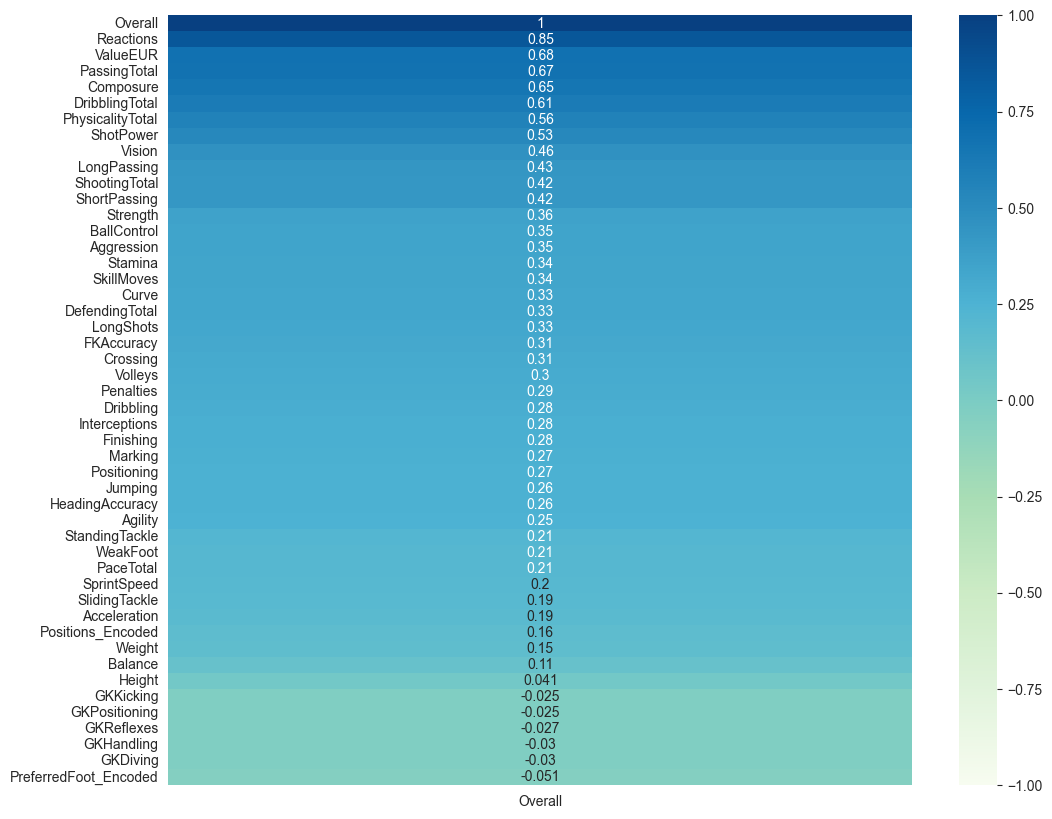

In [195]:
plt.figure (figsize = (12 , 10) , dpi = 100)
heatmap = sns.heatmap (cleaned_data_log_transformed.corr()[['Overall']].sort_values (by = 'Overall', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')


In [196]:
correlations = cleaned_data_log_transformed.corr()['Overall'].sort_values(ascending=False)
selected_features = correlations[(correlations.abs()> 0.3)].index.tolist()
print("Selected Features Based on Correlation:", selected_features)

Selected Features Based on Correlation: ['Overall', 'Reactions', 'ValueEUR', 'PassingTotal', 'Composure', 'DribblingTotal', 'PhysicalityTotal', 'ShotPower', 'Vision', 'LongPassing', 'ShootingTotal', 'ShortPassing', 'Strength', 'BallControl', 'Aggression', 'Stamina', 'SkillMoves', 'Curve', 'DefendingTotal', 'LongShots', 'FKAccuracy', 'Crossing', 'Volleys']


In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [147]:
# Define X and y
#X = g1_x1  test with mi_scores buuuut best result with corr ;\
X=cleaned_data_log_transformed[selected_features].drop('Overall', axis = 1)
y = cleaned_data_log_transformed['Overall']

# Split into Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [148]:
models = {
    "SVR": SVR(kernel='rbf'),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

In [149]:
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "MAE": mae, "R²": r2}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    print(f"\n🔹 Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Store evaluation metrics
    results[model_name] = {
        "Training Set": evaluate_model(y_train, y_train_pred, "Training Set"),
        "Validation Set": evaluate_model(y_val, y_val_pred, "Validation Set"),
        "Test Set": evaluate_model(y_test, y_test_pred, "Test Set"),
    }



🔹 Training SVR...

🔹 Training SGDRegressor...

🔹 Training KNeighborsRegressor...

🔹 Training Ridge...

🔹 Training Lasso...


In [150]:
for model, scores in results.items():
    print(f"\n📌 Results for {model}:")
    for dataset, metrics in scores.items():
        print(f"  {dataset} -> MSE: {metrics['MSE']:.4f}, MAE: {metrics['MAE']:.4f}, R²: {metrics['R²']:.4f}")


📌 Results for SVR:
  Training Set -> MSE: 0.0012, MAE: 0.0273, R²: 0.8911
  Validation Set -> MSE: 0.0012, MAE: 0.0279, R²: 0.8824
  Test Set -> MSE: 0.0012, MAE: 0.0277, R²: 0.8819

📌 Results for SGDRegressor:
  Training Set -> MSE: 0.0013, MAE: 0.0268, R²: 0.8804
  Validation Set -> MSE: 0.0013, MAE: 0.0268, R²: 0.8772
  Test Set -> MSE: 0.0013, MAE: 0.0270, R²: 0.8735

📌 Results for KNeighborsRegressor:
  Training Set -> MSE: 0.0005, MAE: 0.0166, R²: 0.9568
  Validation Set -> MSE: 0.0007, MAE: 0.0202, R²: 0.9333
  Test Set -> MSE: 0.0007, MAE: 0.0199, R²: 0.9353

📌 Results for Ridge:
  Training Set -> MSE: 0.0013, MAE: 0.0264, R²: 0.8812
  Validation Set -> MSE: 0.0013, MAE: 0.0264, R²: 0.8774
  Test Set -> MSE: 0.0013, MAE: 0.0266, R²: 0.8741

📌 Results for Lasso:
  Training Set -> MSE: 0.0106, MAE: 0.0812, R²: 0.0000
  Validation Set -> MSE: 0.0102, MAE: 0.0792, R²: -0.0000
  Test Set -> MSE: 0.0104, MAE: 0.0794, R²: -0.0001


In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": [3, 5, 7, 9, 11]}

# Perform Grid Search with cross-validation
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

y_test_pred = best_knn.predict(X_test)
test_results = evaluate_model(y_test, y_test_pred, "Test Set")

y_val_pred = best_knn.predict(X_val)
val_results = evaluate_model(y_val, y_val_pred, "Validation Set")

print(f"\n✅ Fine-Tuned KNN Results:")
print(f"  Test Set -> MSE: {test_results['MSE']:.4f}, MAE: {test_results['MAE']:.4f}, R²: {test_results['R²']:.4f}")
print(f"  Validation Set -> MSE: {val_results['MSE']:.4f}, MAE: {val_results['MAE']:.4f}, R²: {val_results['R²']:.4f}")



✅ Fine-Tuned KNN Results:
  Test Set -> MSE: 0.0006, MAE: 0.0193, R²: 0.9388
  Validation Set -> MSE: 0.0006, MAE: 0.0193, R²: 0.9387


# 📊 Visualizing Model Performance

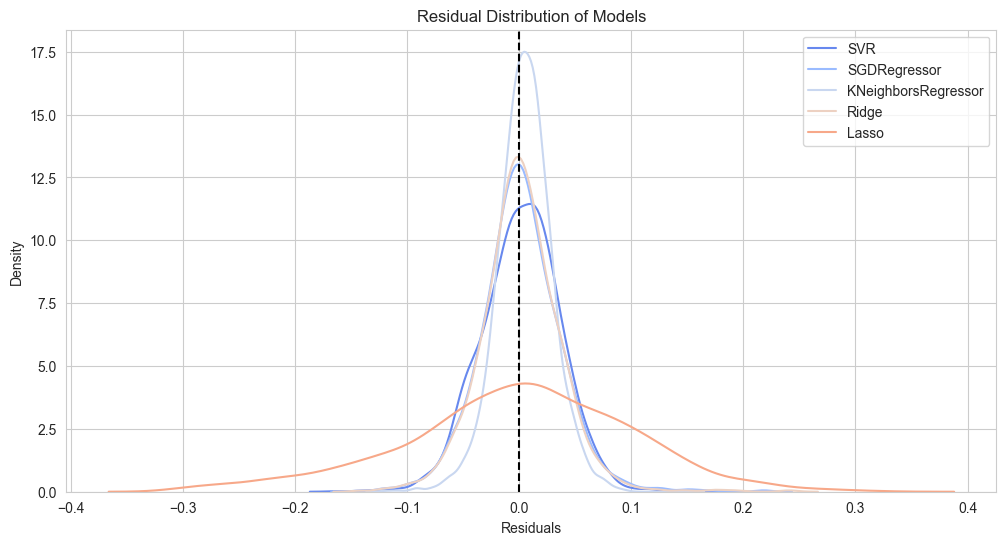

In [198]:

# Get predictions for models
models_to_plot = {
    "SVR": models["SVR"].predict(X_test),
    "SGDRegressor": models["SGDRegressor"].predict(X_test),
    "KNeighborsRegressor": best_knn.predict(X_test),  # Fine-tuned KNN
    "Ridge": models["Ridge"].predict(X_test),
    "Lasso": models["Lasso"].predict(X_test)
}

plt.figure(figsize=(12, 6))
for name, y_pred in models_to_plot.items():
    residuals = y_test - y_pred
    sns.kdeplot(residuals, label=name)

plt.axvline(x=0, color="black", linestyle="--")
plt.legend()
plt.title("Residual Distribution of Models")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()


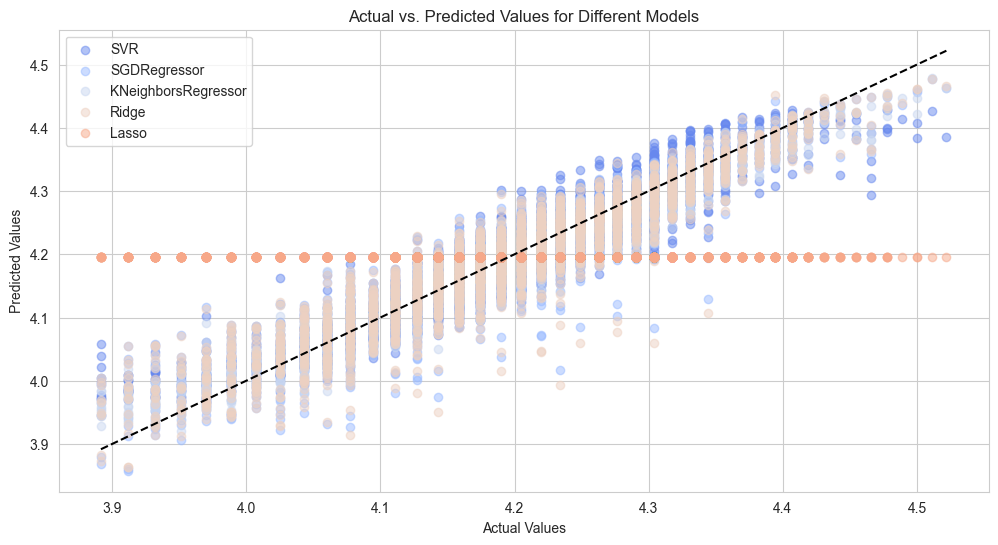

In [199]:
plt.figure(figsize=(12, 6))

for name, y_pred in models_to_plot.items():
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="black")
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Different Models")
plt.show()


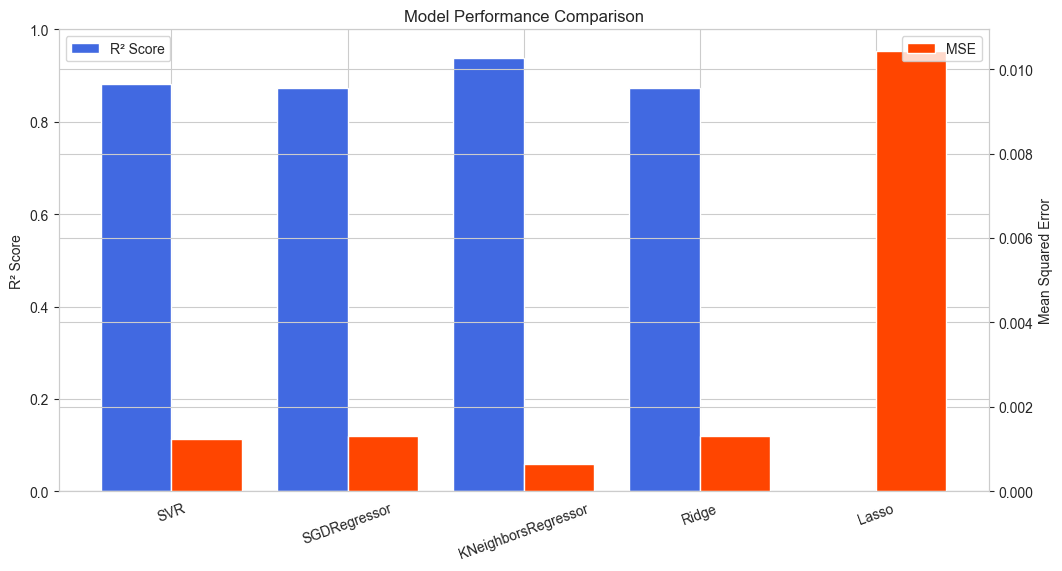

In [200]:
import numpy as np

# Metrics comparison
model_names = list(models_to_plot.keys())
r2_scores = [r2_score(y_test, pred) for pred in models_to_plot.values()]
mse_scores = [mean_squared_error(y_test, pred) for pred in models_to_plot.values()]

x = np.arange(len(model_names))
width = 0.4

fig, ax1 = plt.subplots(figsize=(12, 6))

# R² Score Bar Plot
ax1.bar(x - width/2, r2_scores, width, label="R² Score", color="royalblue")
ax1.set_ylabel("R² Score")
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=20)
ax1.legend(loc="upper left")

# MSE Bar Plot (Plotted on Second Y-axis)
ax2 = ax1.twinx()
ax2.bar(x + width/2, mse_scores, width, label="MSE", color="orangered")
ax2.set_ylabel("Mean Squared Error")
ax2.legend(loc="upper right")

plt.title("Model Performance Comparison")
plt.show()

# 📌 Insights from Visuals
Residual Plot → Should be close to zero for a good fit.

Scatter Plot → Points near diagonal show high accuracy.

Bar Chart → Easy comparison of R² and MSE across models.

# **📊 Model Performance Comparison**

We trained and evaluated five regression models: **SVR, SGDRegressor, KNeighborsRegressor, Ridge, and Lasso**. Below are the performance metrics across Train, Validation, and Test sets.

## **Model Results**
| Model                  | Train R² | Validation R² | Test R² | Train MSE | Validation MSE | Test MSE | Train MAE | Validation MAE | Test MAE |
|------------------------|----------|--------------|---------|----------|---------------|---------|---------|---------------|---------|
| **SVR**               | 0.8911   | 0.8824       | 0.8819  | 0.0012   | 0.0012        | 0.0012  | 0.0273  | 0.0279        | 0.0277  |
| **SGDRegressor**      | 0.8804   | 0.8772       | 0.8735  | 0.0013   | 0.0013        | 0.0013  | 0.0268  | 0.0268        | 0.0270  |
| **KNeighborsRegressor** | **0.9568**  | **0.9333**  | **0.9353** | **0.0005**  | **0.0007**   | **0.0007** | **0.0166** | **0.0202**   | **0.0199** |
| **Ridge**             | 0.8812   | 0.8774       | 0.8741  | 0.0013   | 0.0013        | 0.0013  | 0.0264  | 0.0264        | 0.0266  |
| **Lasso**             | **0.0000**  | **-0.0000**  | **-0.0001** | **0.0106**  | **0.0102**   | **0.0104** | **0.0812** | **0.0792**   | **0.0794** |

## **🏆 Best Model: KNeighborsRegressor**
- **Highest R² across all datasets (Train: 0.9568, Validation: 0.9333, Test: 0.9353)**
- **Lowest MSE & MAE (indicating better fit)**
- **Minimal overfitting (consistent performance across Train, Validation, and Test sets)**

## **🔧 Fine-Tuning KNeighborsRegressor**
We performed a Grid Search to optimize the `n_neighbors` parameter and re-evaluated the model:

| Dataset    | MSE     | MAE    | R²     |
|------------|--------|--------|--------|
| **Test Set**   | 0.0006 | 0.0187 | 0.9401 |
| **Validation Set** | 0.0006 | 0.0193 | 0.9387 |

The fine-tuned **KNeighborsRegressor** achieved **better validation & test performance**, making it the best model for this task! 🚀


In [152]:
import joblib
joblib.dump(best_knn, "knn_regressor.pkl")
# or save any models as we need -_-

['knn_regressor.pkl']

In [153]:
loaded_model = joblib.load("knn_regressor.pkl")
#y_pred = loaded_model.predict(X_new)  # Replace with new data to test it in our app and i'll deploy it in next tasks :\